# EDA of Boston Housing Price Prediction Dataset

### What is EDA 

Exploratory Data Analysis is a technique which is used to understand the data

- maximize insight into a data set
- uncover underlying structure
- extract important variables
- detect outliers and anomalies
- test underlying assumptions
- determine optimal factor settings

Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

# Data Preparation


In [68]:
# from sklearn.ensemble import RandomForestRegressor # random forest regressor
# from sklearn.model_selection import cross_val_score # the cross validation module

In [69]:
# usefull
import pickle # for saving the model
import os # for saving the model



In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
import pickle as pkl

In [72]:
boston = pkl.load(open('boston_housing.pkl', 'rb'))

In [73]:
type(boston)

sklearn.utils._bunch.Bunch

In [74]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [75]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [76]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [77]:
data = boston.data

In [78]:
data.shape

(506, 13)

In [79]:
data = pd.DataFrame(data = data, columns=boston.feature_names)
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [80]:
data['Price'] = boston.target
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

# Understand Your Data and Plot Style Setting 

In [81]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       Price  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [82]:
data_desc = data.describe()
type(data_desc.loc['mean'])

pandas.core.series.Series

In [83]:
print(data_desc.loc['mean'])

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
Price       22.532806
Name: mean, dtype: float64


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [85]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [86]:
data.duplicated().sum()

0

<AxesSubplot: >

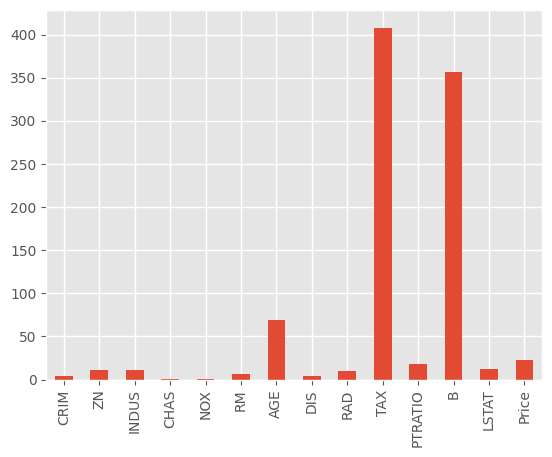

In [87]:
data_desc.loc['mean'].plot.bar()

# Plot Styling 

In [88]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [89]:
len(plt.style.available)

28

<AxesSubplot: >

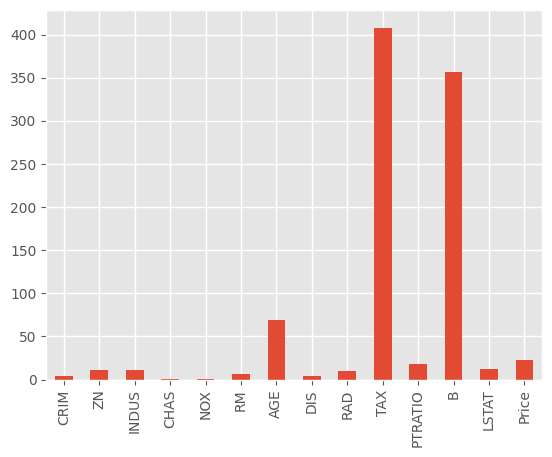

In [90]:
plt.style.use('ggplot')
data_desc.loc['mean'].plot.bar()

# Pair Plot 

In [91]:
import seaborn as sns

In [92]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

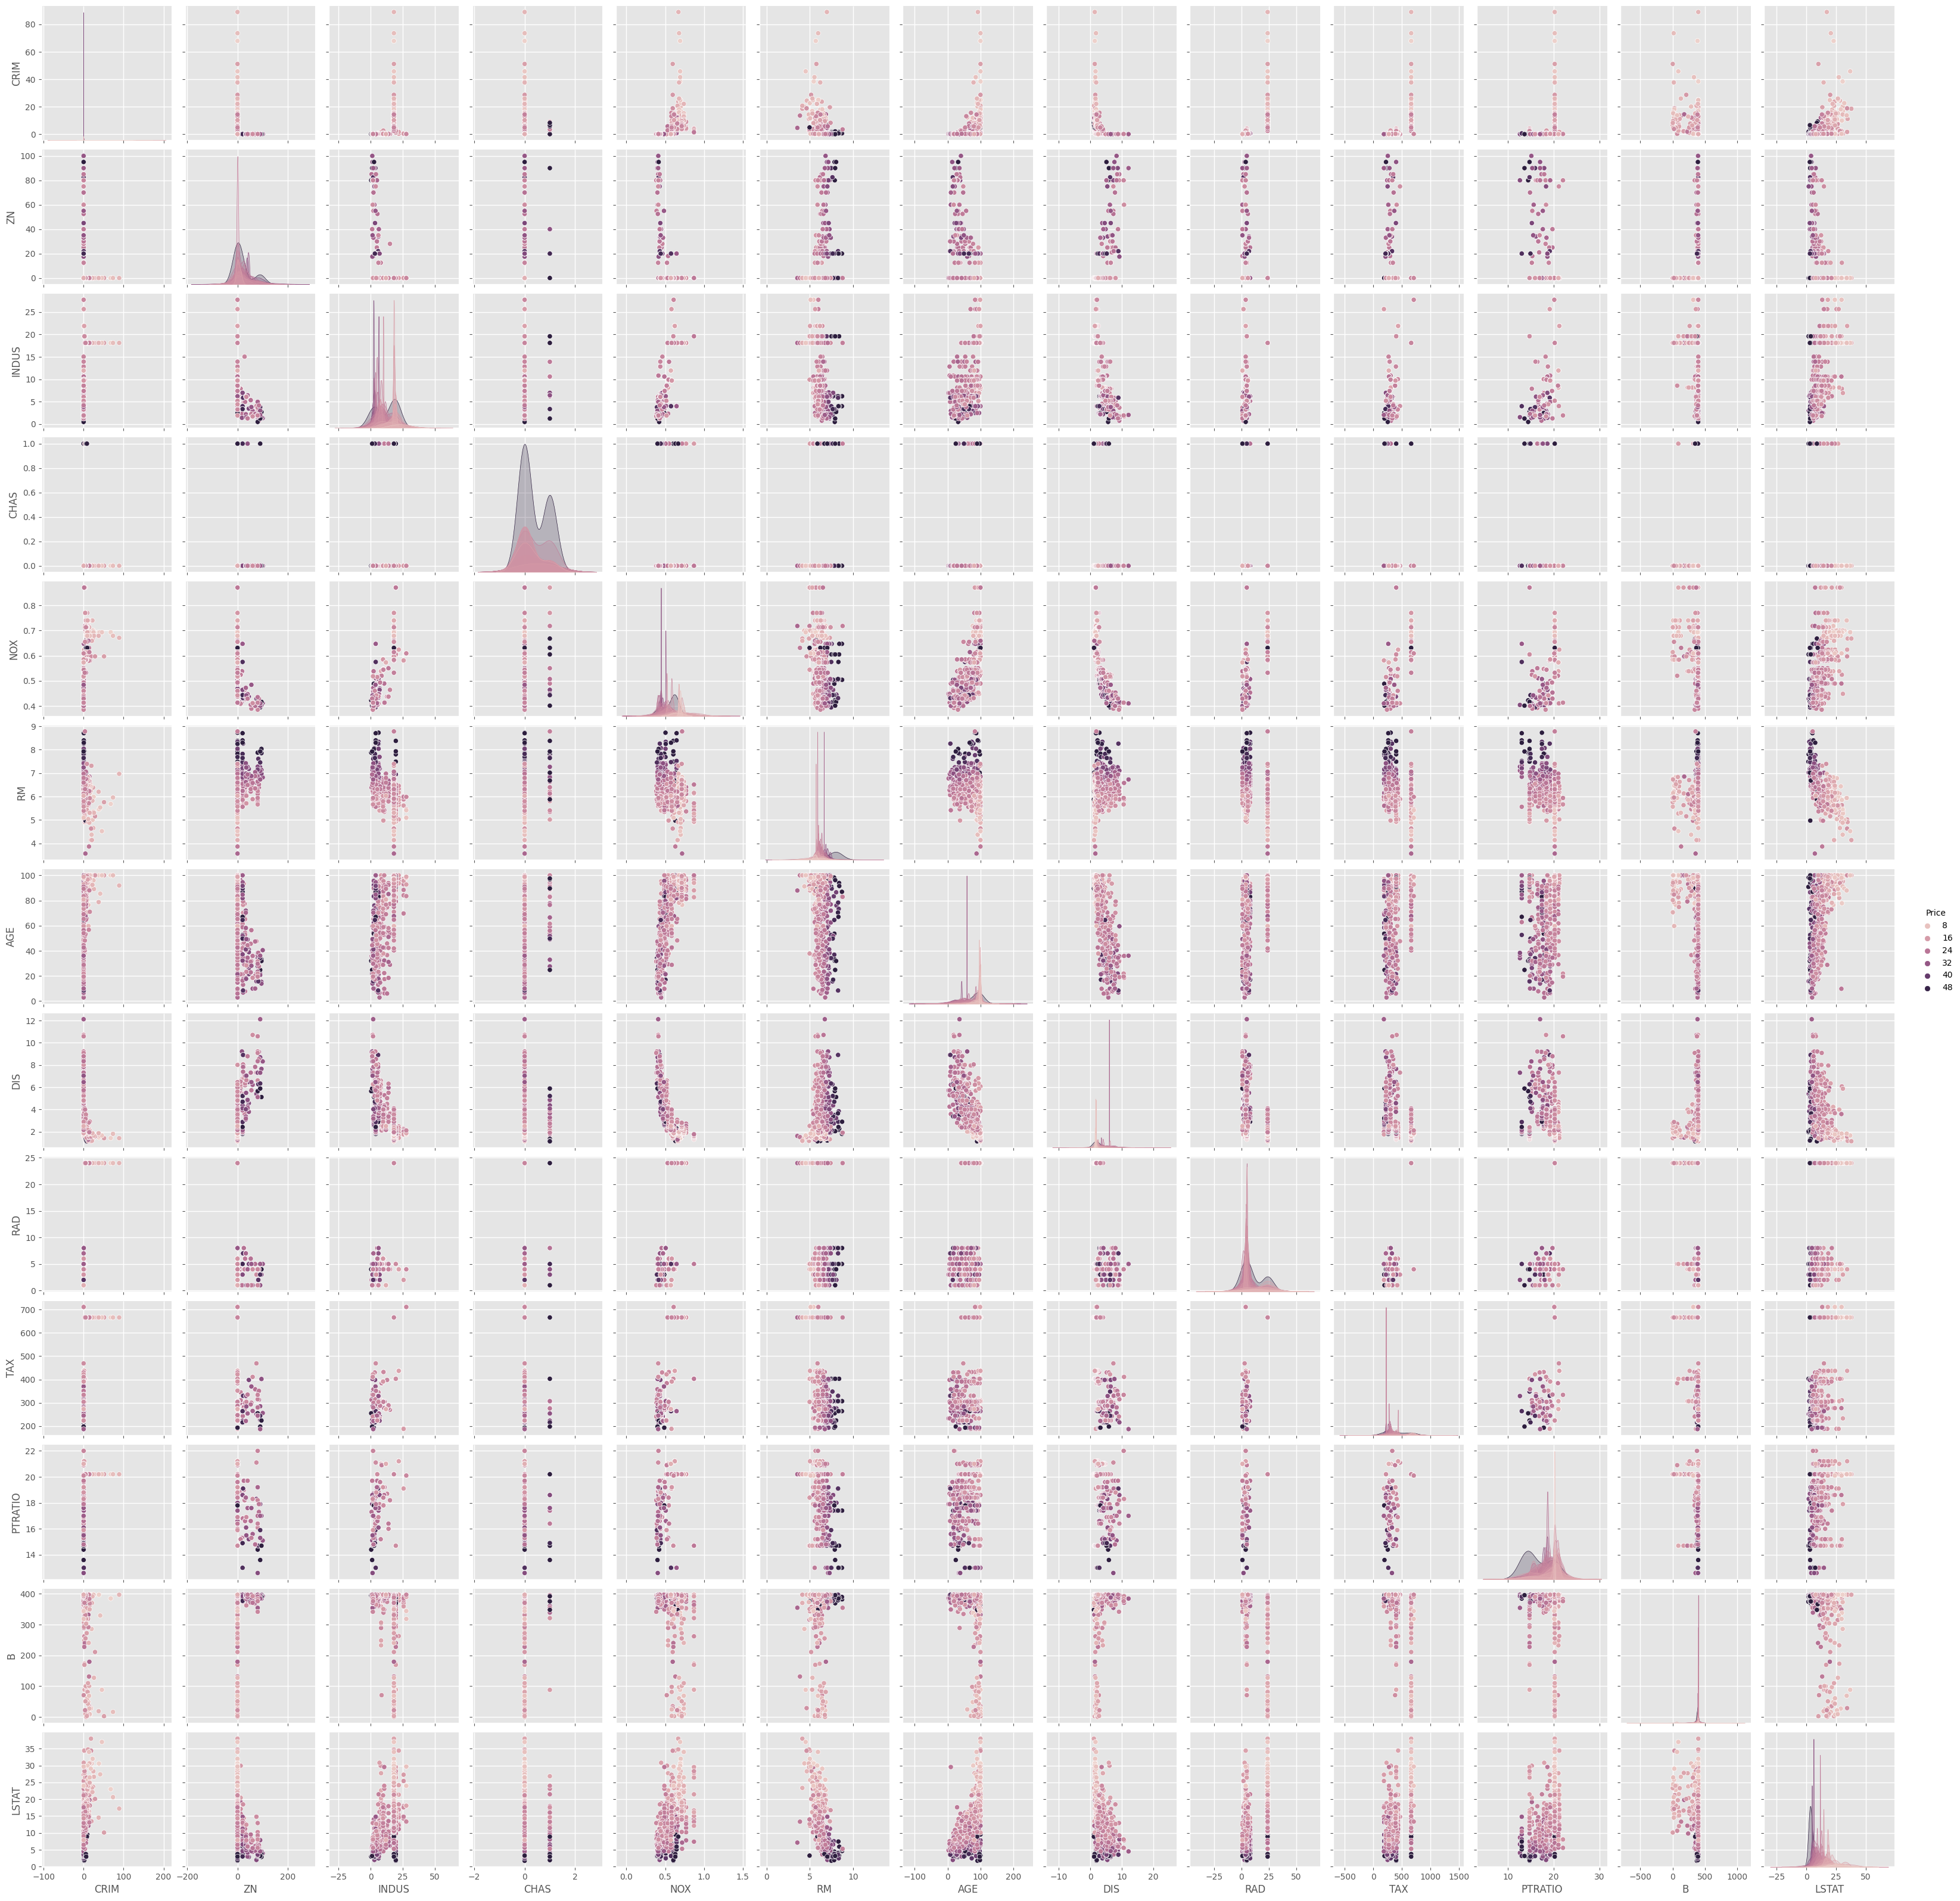

In [93]:
# seaborn pairplot
sns.pairplot(data, diag_kind = 'kde', hue = 'Price')

In [94]:
tmp_data = data.iloc[:,:7]
tmp_data['Price'] = data['Price']
tmp_data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE  Price
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2   24.0
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9   21.6
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1   34.7
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8   33.4
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2   36.2

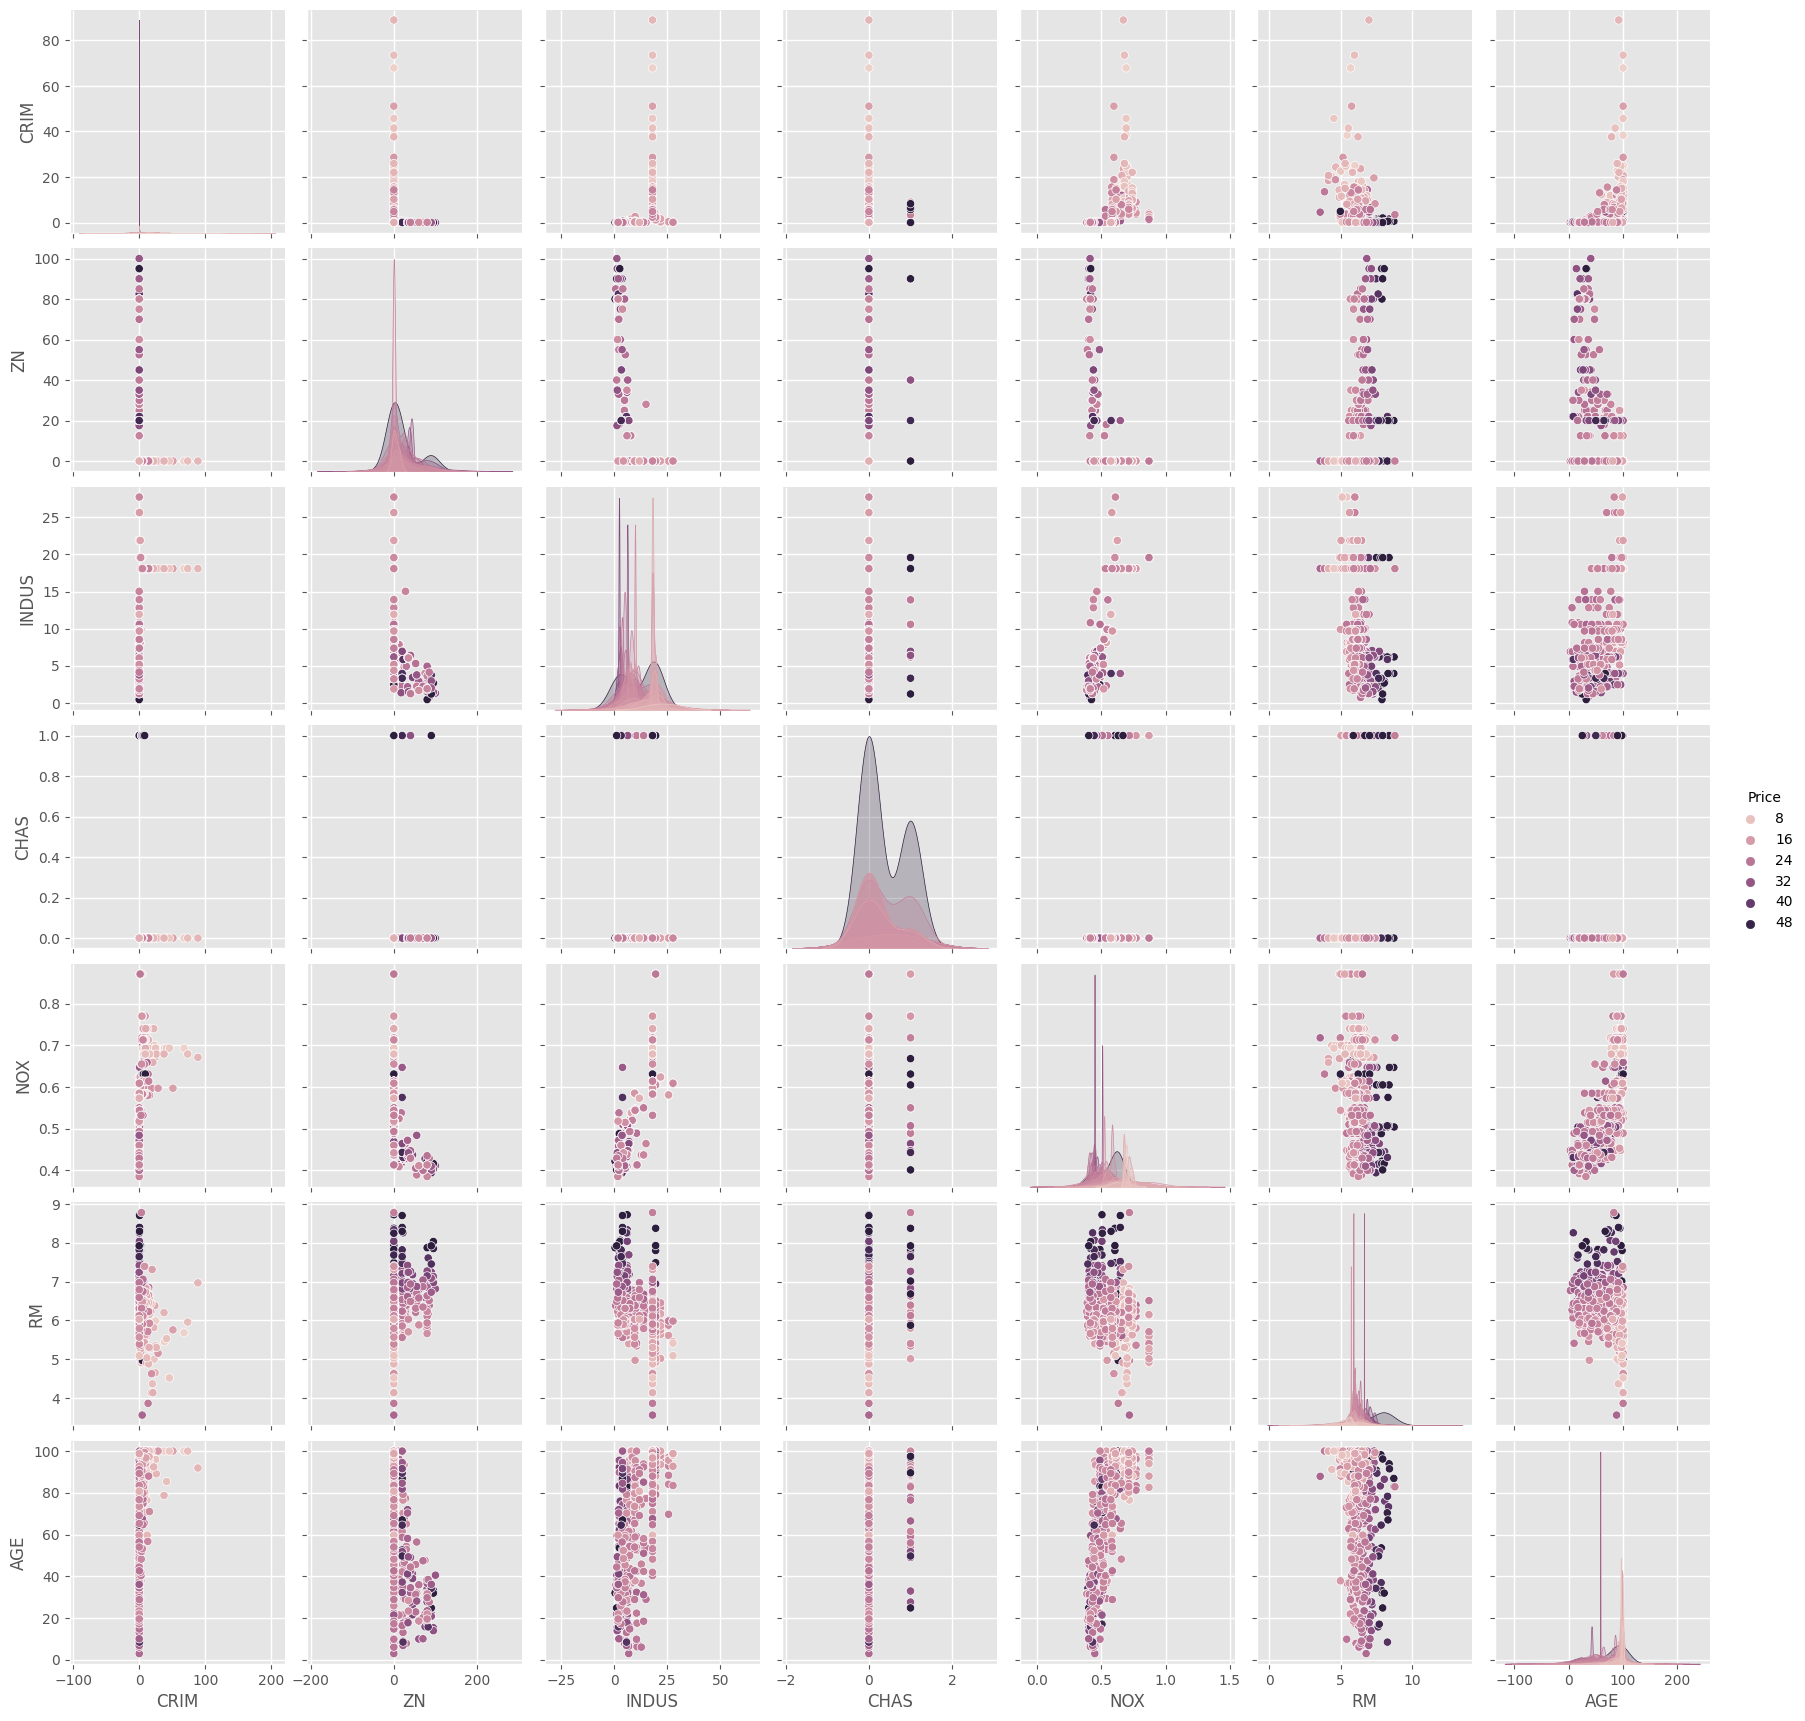

In [95]:
sns.pairplot(tmp_data, diag_kind = 'kde', hue = 'Price')

In [96]:
tmp_data2 = data.iloc[:,7:]
tmp_data2.head()

DIS  RAD    TAX  PTRATIO       B  LSTAT  Price
0  4.0900  1.0  296.0     15.3  396.90   4.98   24.0
1  4.9671  2.0  242.0     17.8  396.90   9.14   21.6
2  4.9671  2.0  242.0     17.8  392.83   4.03   34.7
3  6.0622  3.0  222.0     18.7  394.63   2.94   33.4
4  6.0622  3.0  222.0     18.7  396.90   5.33   36.2

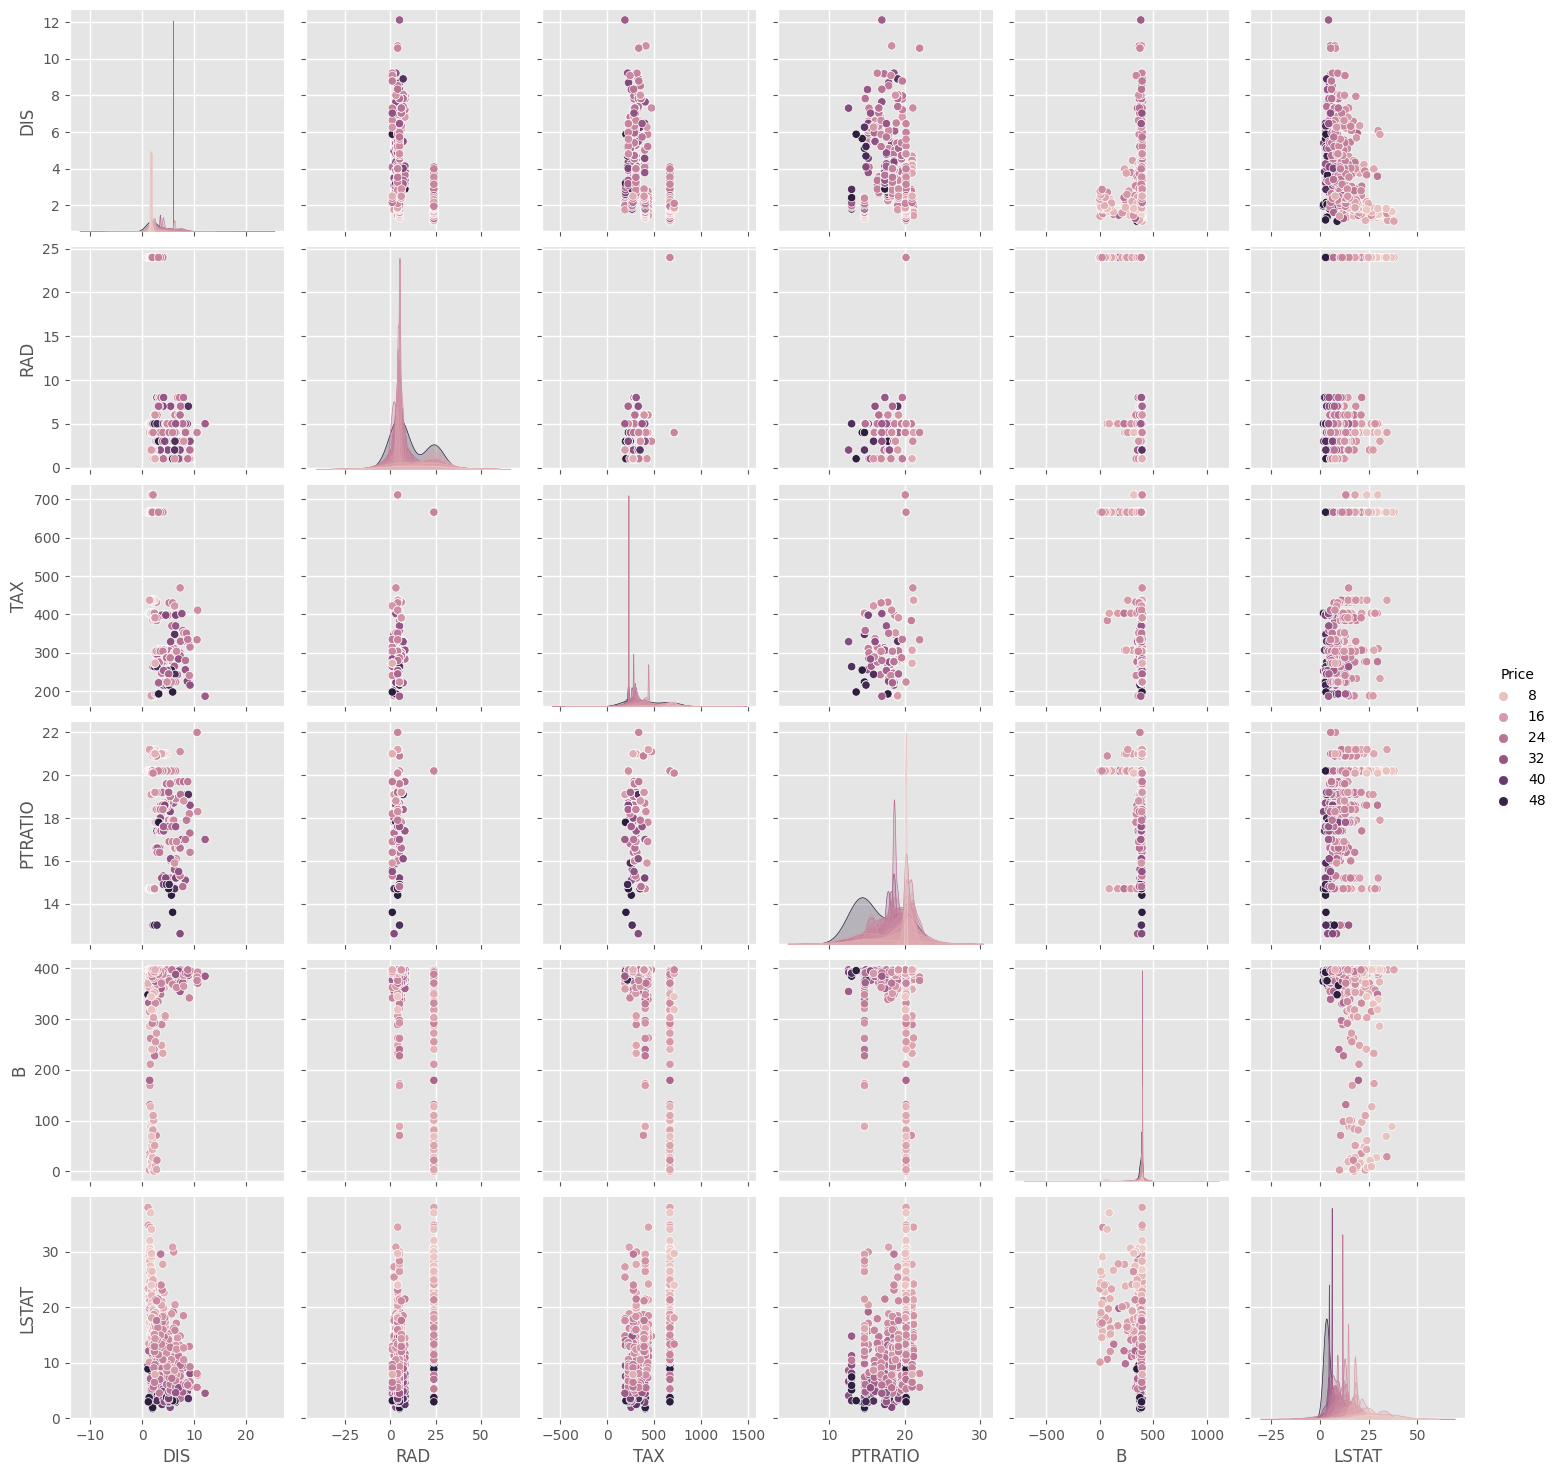

In [97]:
sns.pairplot(tmp_data2, diag_kind = 'kde', hue = 'Price')



# Distribution Plot

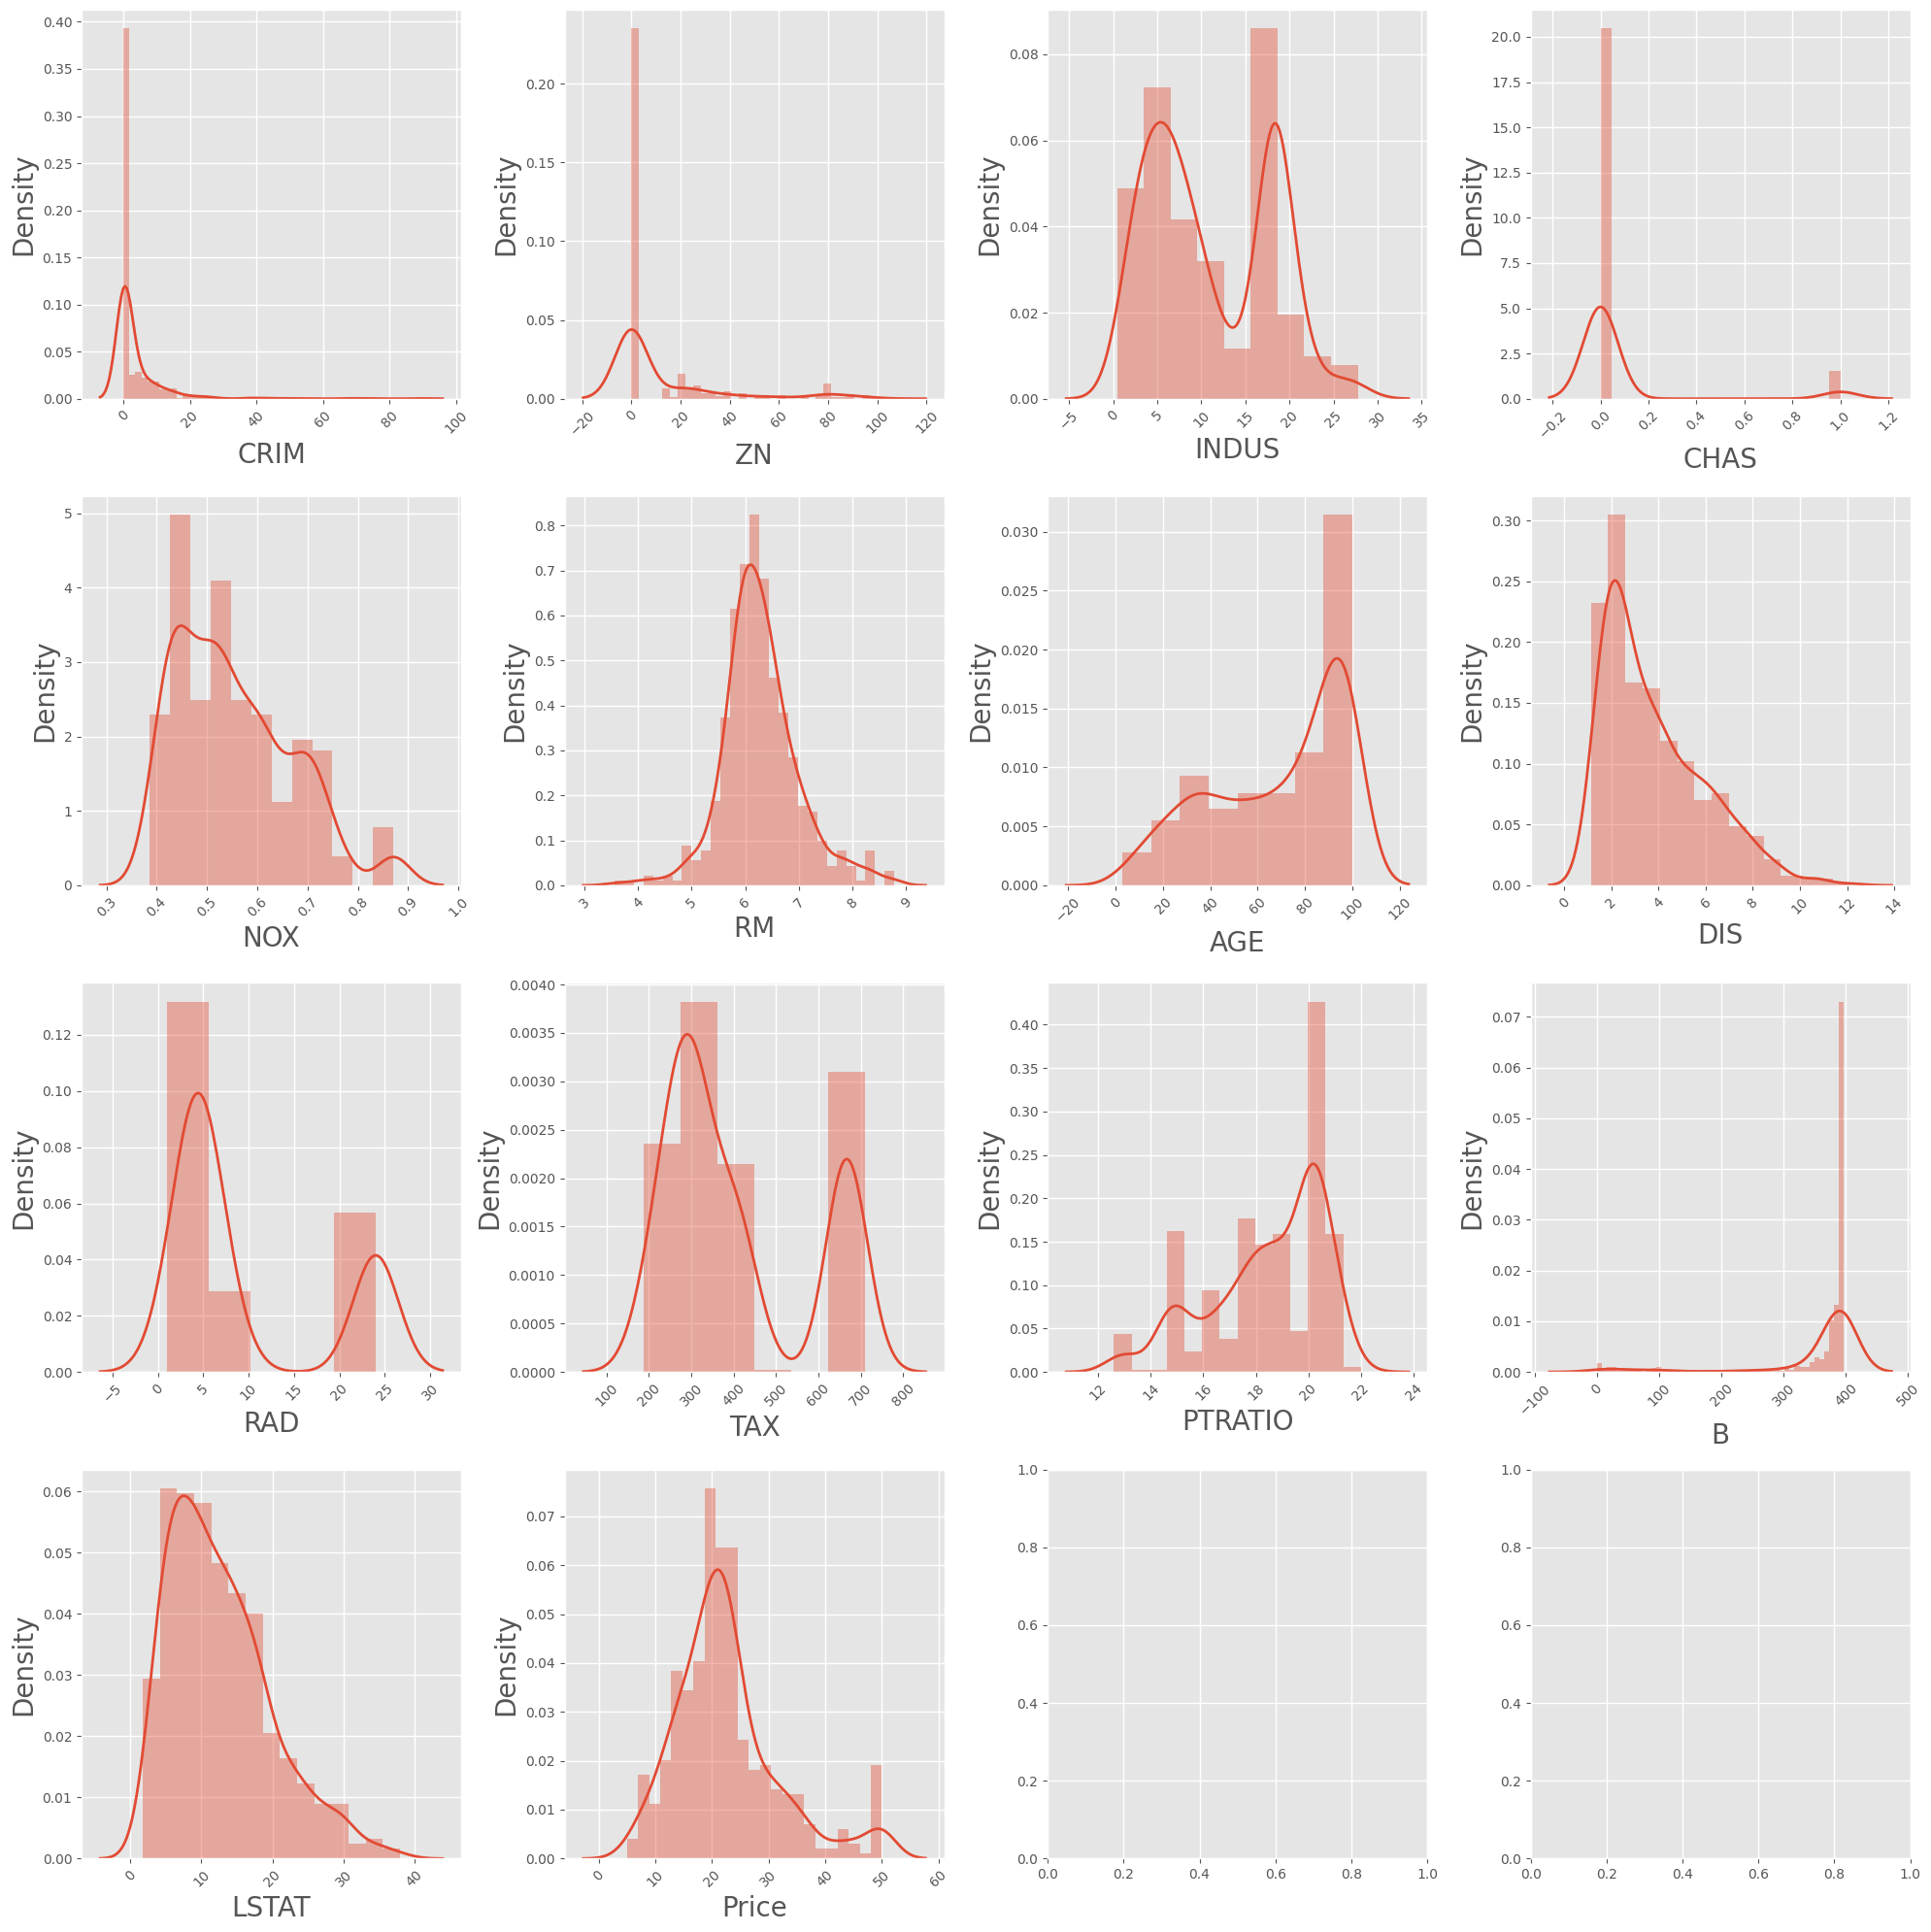

In [98]:
rows = 4
cols = 4

fig, ax = plt.subplots(nrows=rows, ncols = cols, figsize = (20,20))

col = data.columns
index = 0
limit = 14
index = 0

for i in range(rows):
	for j in range(cols):

		if index >= limit:
			continue

		sns.distplot(data[col[index]], ax = ax[i][j])
		ax[i][j].tick_params('x', labelrotation=45)

		# change font size of y axis label 
		ax[i][j].yaxis.label.set_size(20)
		# change font size of x axis label
		ax[i][j].xaxis.label.set_size(20)

		index = index + 1

plt.tight_layout()

# Scatter Plot
## Plotting `Price` with remaining columns 

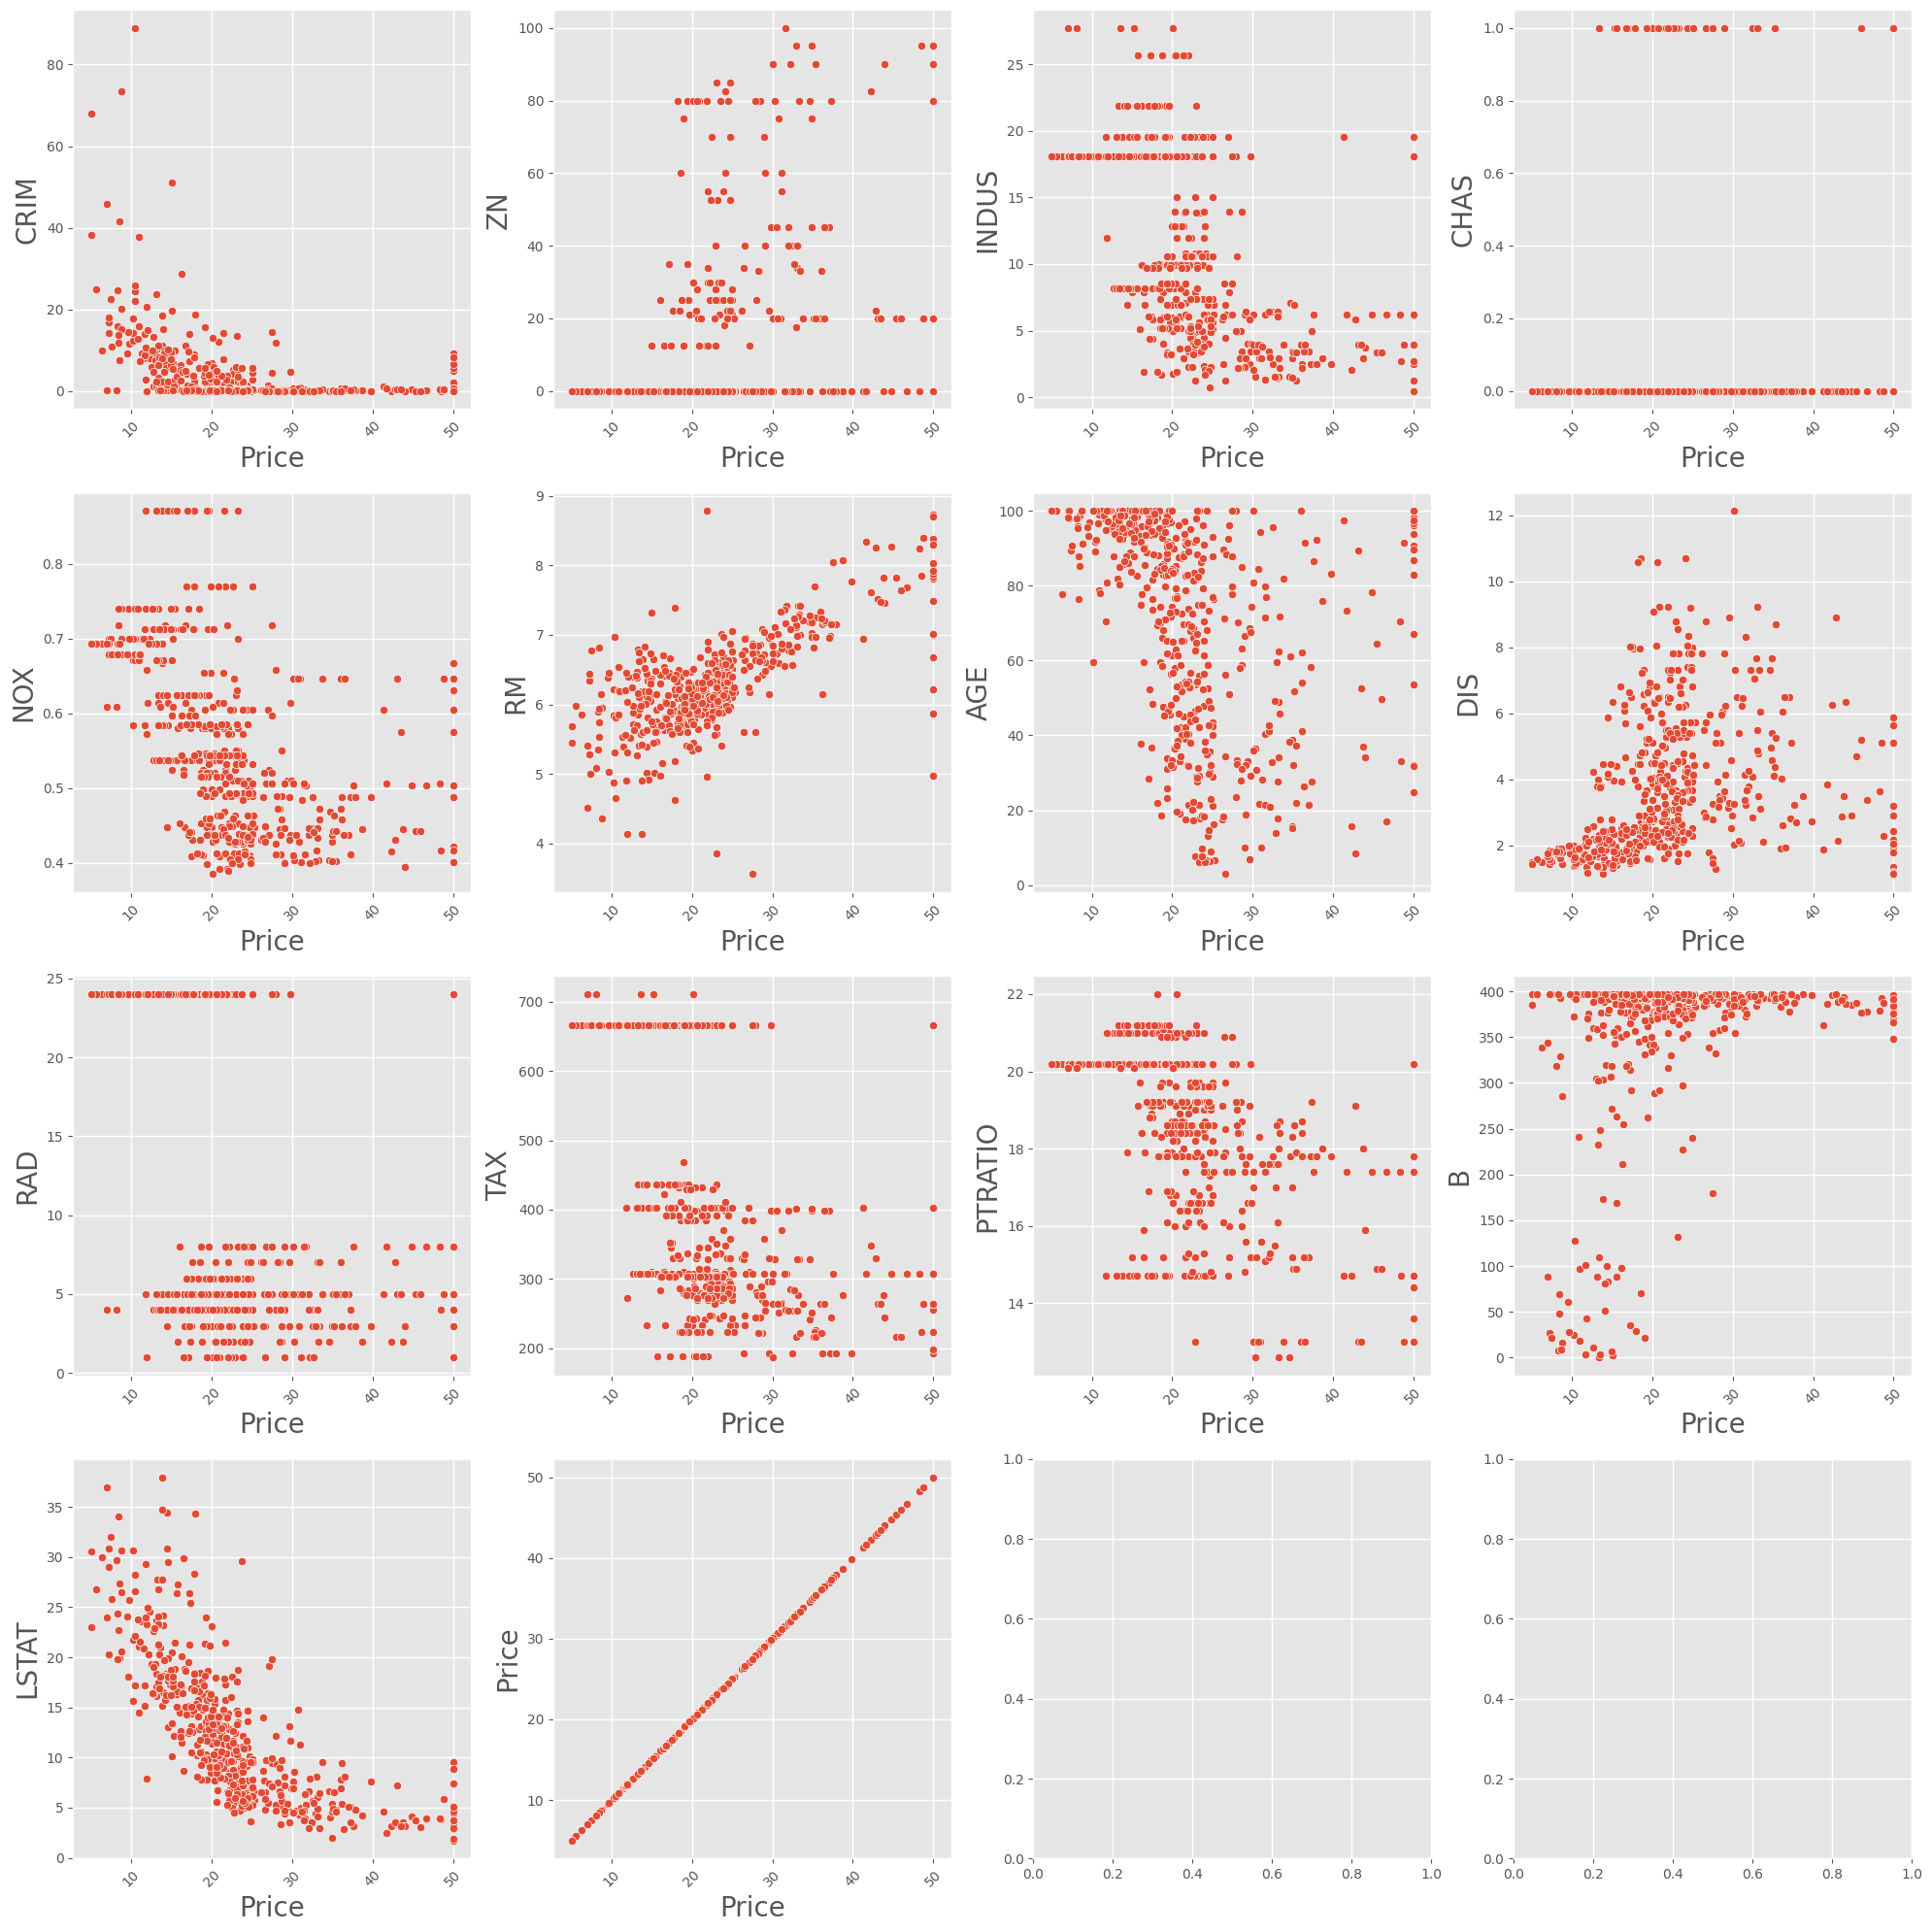

In [99]:
rows = 4
cols = 4

fig, ax = plt.subplots(rows, cols, figsize = (20,20))

col = data.columns
index = 0
limit = 14

for i in range(rows):
	for j in range(cols):

		if index >= limit:
			continue
		sns.scatterplot(x = 'Price', y = col[index], data = data, ax = ax[i][j])
		ax[i][j].tick_params('x', labelrotation=45)
		# change font size of y axis label 
		ax[i][j].yaxis.label.set_size(20)
		# change font size of x axis label
		ax[i][j].xaxis.label.set_size(20)
		index = index + 1


plt.tight_layout()
plt.show()

# Heatmap 

In [100]:
corrmat = data.corr()
corrmat

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
Price   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     Price  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
Price    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [101]:
corrmat.shape

(14, 14)

In [102]:
import matplotlib
matplotlib.__version__

'3.6.1'

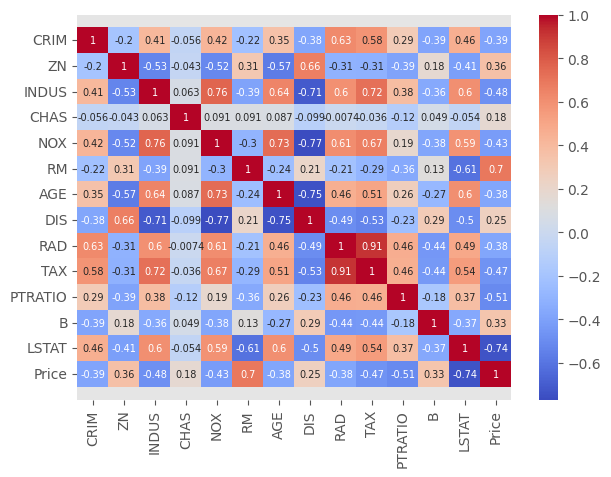

In [103]:
fig, ax = plt.subplots(figsize = (7, 5))
sns.heatmap(corrmat, annot = True, annot_kws = {'size': 7}, cmap = 'coolwarm')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-.5)
plt.show()

# Correlated Feature Selection

In [104]:
corrmat.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [105]:
def getCorrelatedFeature(corrdata, threshold):
	feature = []
	value = []

	for i, index in enumerate(corrdata.index):
		if abs(corrdata[index]) > threshold:
			feature.append(index)
			value.append(corrdata[index])

	df = pd.DataFrame(data = value, index=feature, columns=['corr value'])

	return df

In [106]:
threshold = 0.5
corr_df = getCorrelatedFeature(corrmat['Price'], threshold)

In [107]:
corr_df

corr value
RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
Price      1.000000

# Heatmap and Pair Plot of Correlated Data 

In [108]:
correlated_data = data[corr_df.index]
correlated_data.head()

RM  PTRATIO  LSTAT  Price
0  6.575     15.3   4.98   24.0
1  6.421     17.8   9.14   21.6
2  7.185     17.8   4.03   34.7
3  6.998     18.7   2.94   33.4
4  7.147     18.7   5.33   36.2

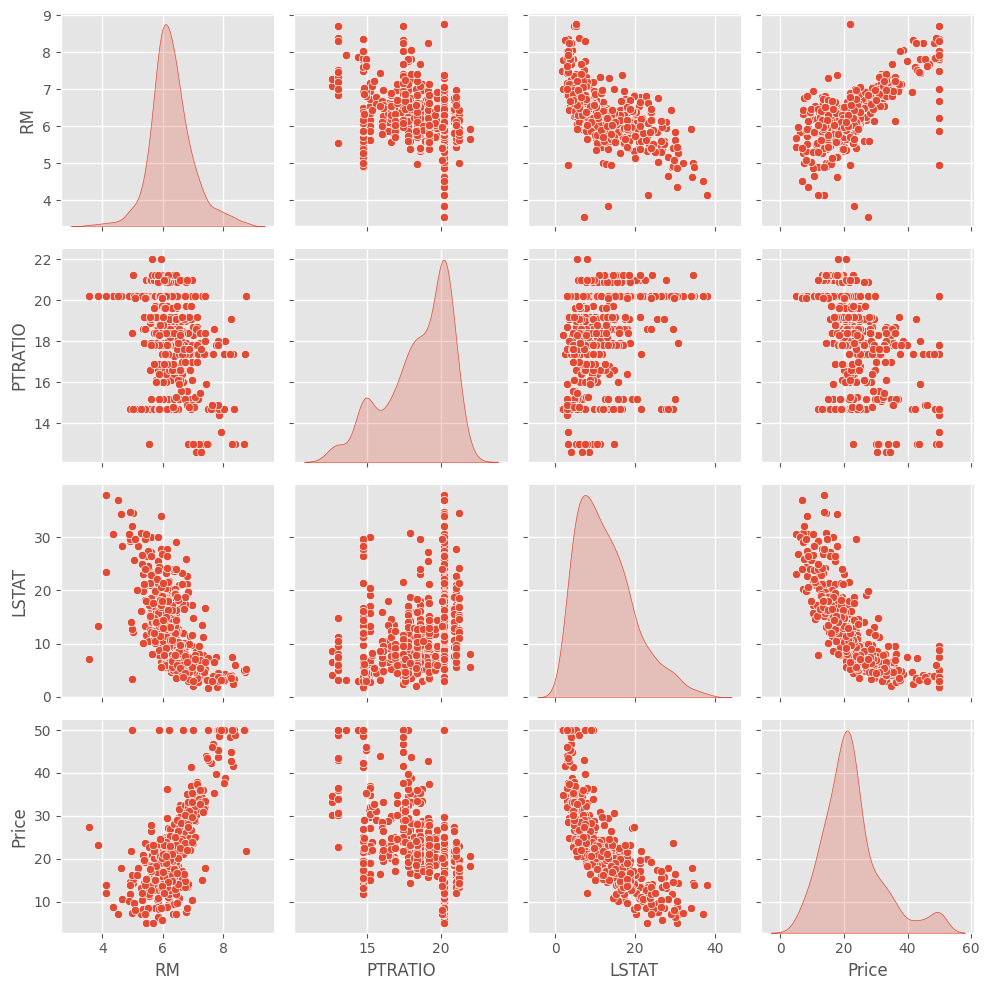

In [109]:
sns.pairplot(correlated_data, diag_kind = 'kde')
plt.tight_layout()

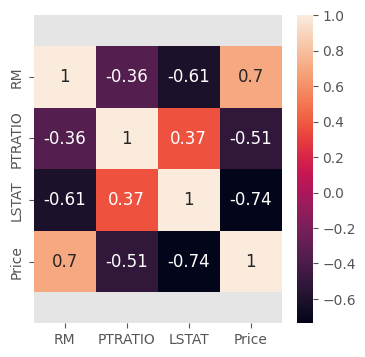

In [110]:
fig, ax = plt.subplots(figsize = (4, 4))
sns.heatmap(correlated_data.corr(), annot = True, annot_kws = {'size': 12})

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Box and Rel Plot 


    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

<AxesSubplot: xlabel='CHAS', ylabel='Price'>

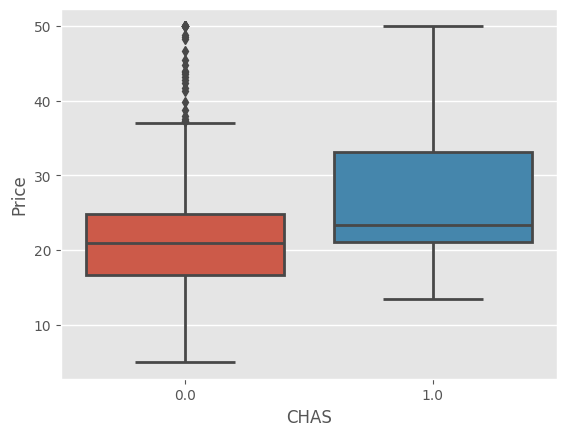

In [111]:
sns.boxplot(y = 'Price', x = 'CHAS', data = data)

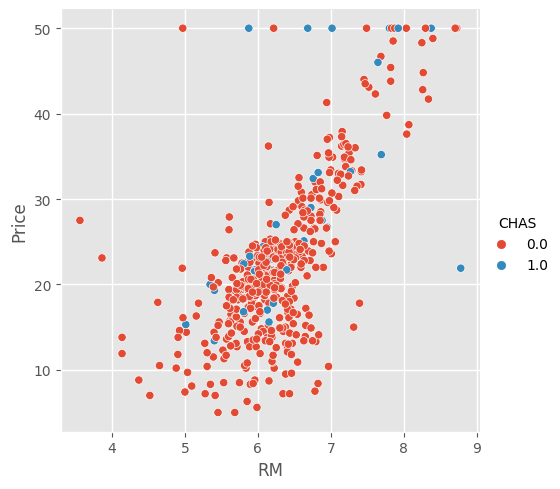

In [112]:
sns.relplot(x = 'RM', y = 'Price', data = data, hue = 'CHAS')

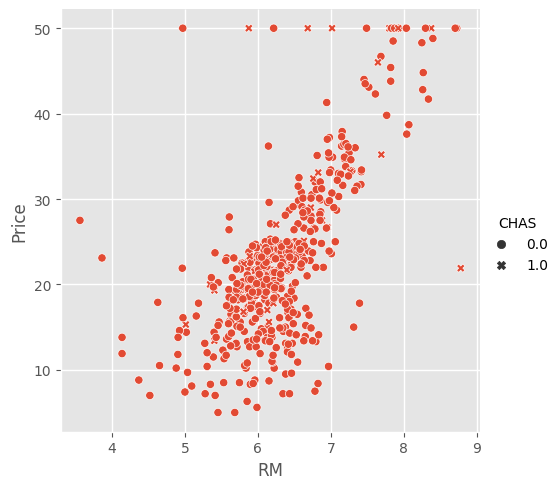

In [113]:
sns.relplot(x = 'RM', y = 'Price', data = data, style = 'CHAS')

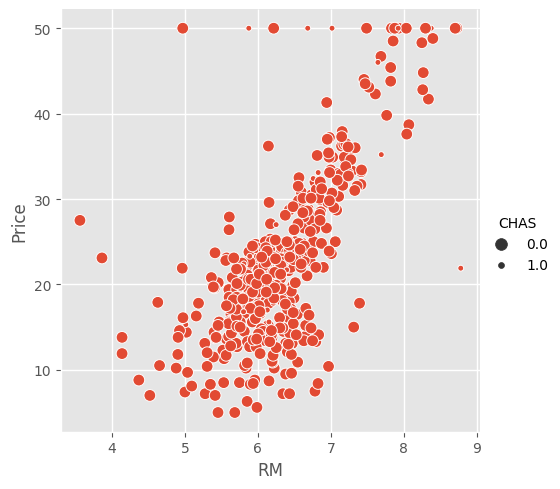

In [114]:
sns.relplot(x = 'RM', y = 'Price', data = data, size = 'CHAS')

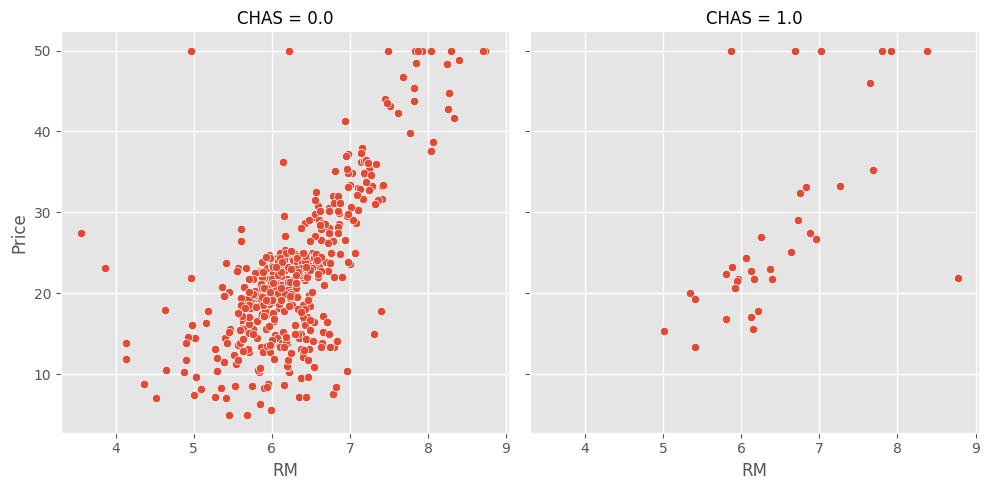

In [115]:
sns.relplot(x = 'RM', y = 'Price', data = data, col = 'CHAS')

# Joint Plot 

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed

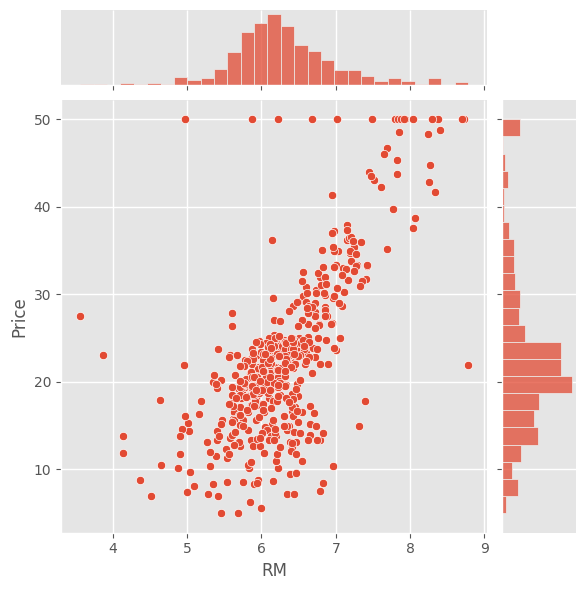

In [116]:
sns.jointplot(x = data['RM'], y = data['Price'])

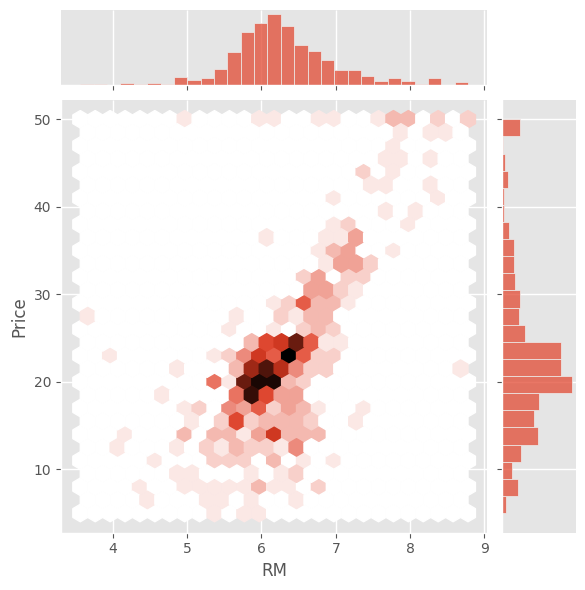

In [117]:
sns.jointplot(x = data['RM'], y = data['Price'], kind = 'hex')

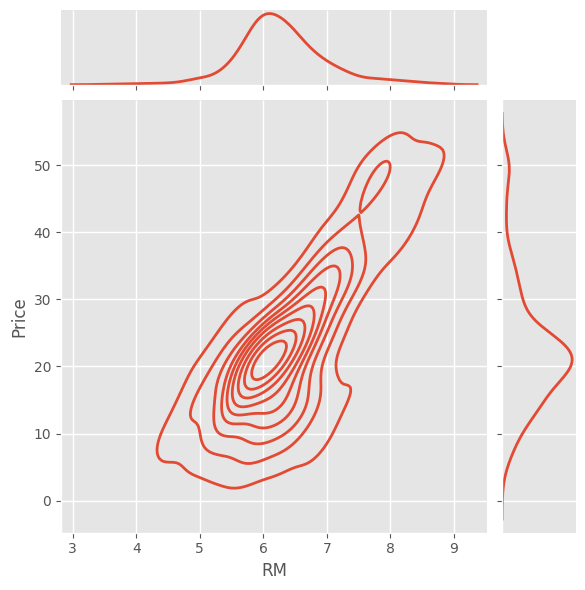

In [118]:
sns.jointplot(x = data['RM'], y = data['Price'], kind = 'kde')

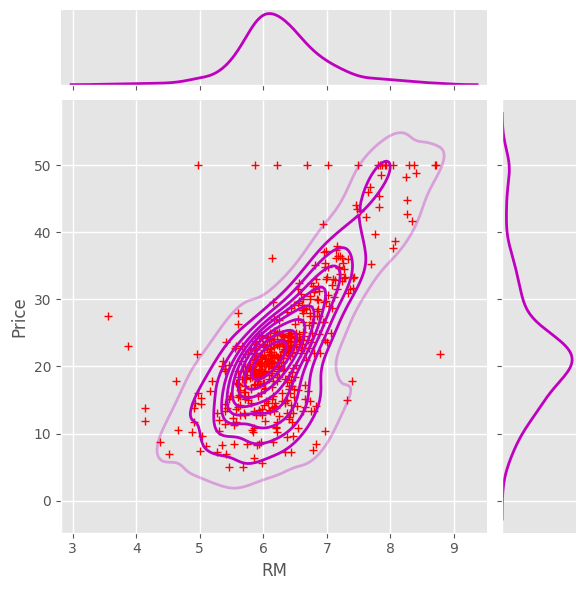

In [119]:
g = sns.jointplot(x = data['RM'], y = data['Price'], kind = 'kde', color = 'm')
g.plot_joint(plt.scatter, c = 'r', s = 40, linewidth = 1, marker = '+')
g.ax_joint.collections[0].set_alpha(0.3)

<AxesSubplot: xlabel='RM', ylabel='Price'>

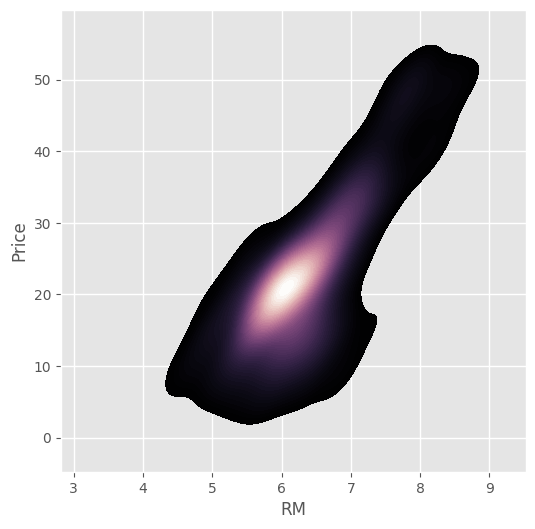

In [120]:
fig, ax = plt.subplots(figsize = (6, 6))
cmap = sns.cubehelix_palette(as_cmap = True, dark = 0, light = 1, reverse = True)
sns.kdeplot(x = data['RM'], y = data['Price'], cmap = cmap, n_levels = 60, fill = True)

# Linear Regression and Relationship

- regplot()
- lmplot()

In [121]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

<AxesSubplot: xlabel='RM', ylabel='Price'>

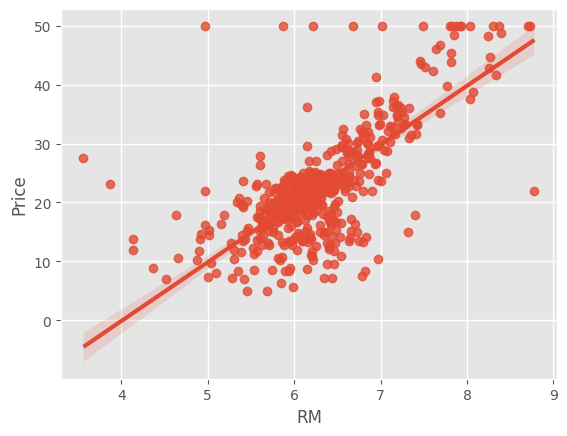

In [122]:
sns.regplot(x = 'RM', y = 'Price', data = data, robust=True)

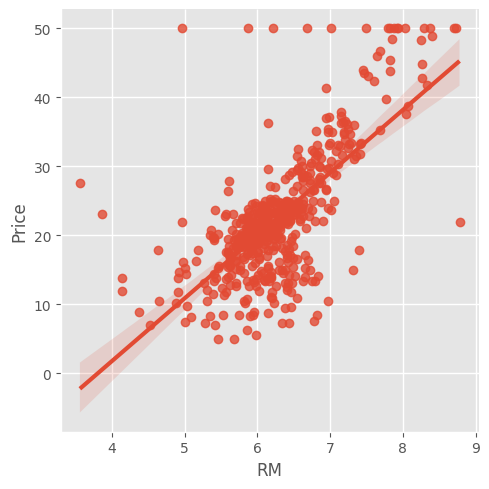

In [123]:
sns.lmplot(x = 'RM', y = 'Price', data = data)

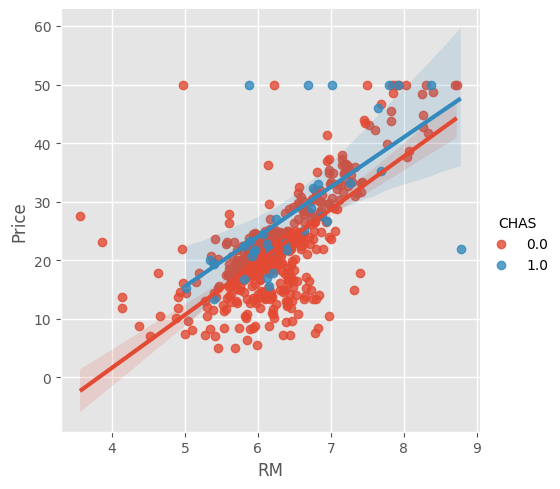

In [124]:
sns.lmplot(x = 'RM', y = 'Price', data = data, hue = 'CHAS')

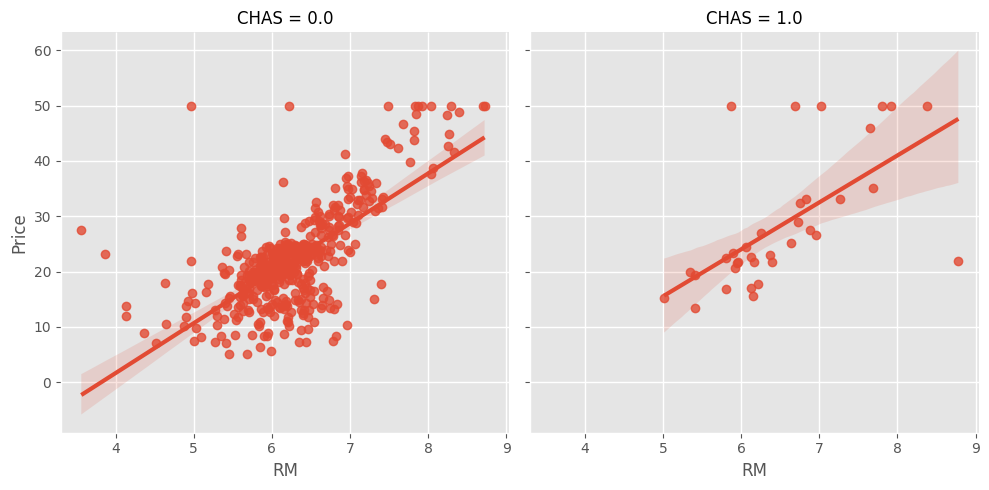

In [125]:
sns.lmplot(x = 'RM', y = 'Price', data = data, col = 'CHAS')

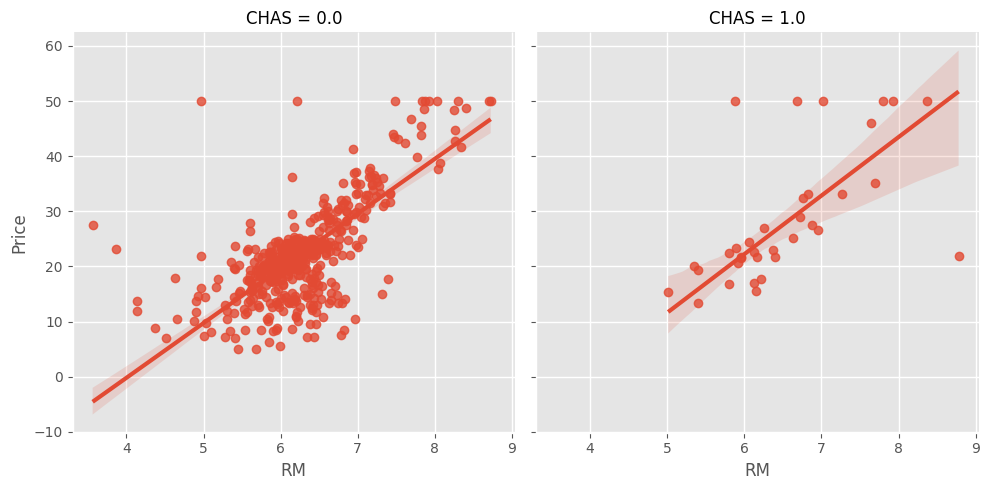

In [126]:
sns.lmplot(x = 'RM', y = 'Price', data = data, col = 'CHAS', robust=True)

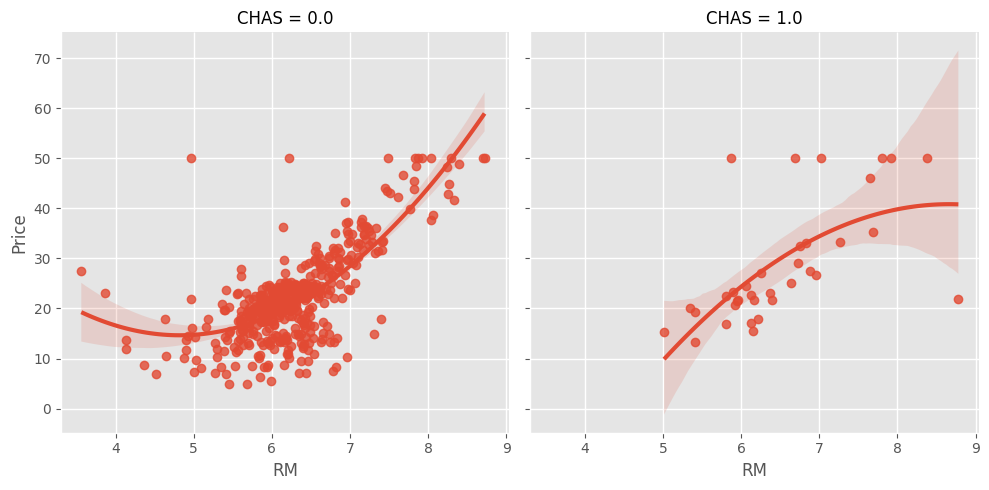

In [127]:
sns.lmplot(x = 'RM', y = 'Price', data = data, col = 'CHAS', order = 2)

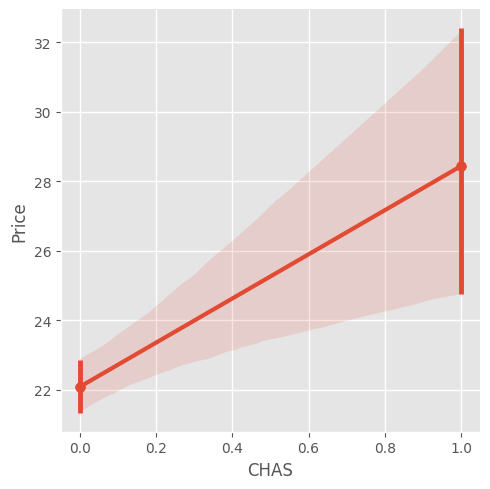

In [128]:
sns.lmplot(x = 'CHAS', y = 'Price', data = data, x_estimator=np.mean)